In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from torchqc.states import QuantumState
from torchqc.common_functions import get_density_matrix, expect_val_dm
from torchqc.operators import Operator, DynamicOperator
from torchqc.common_matrices import sigmaZ, sigmaX
from torchqc.dynamics import lindblad_equation
from torchqc.dynamics import lindblad_equation_FLS

In [16]:
device = "cpu"

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

* Start from basis state $\ket{0}$

In [17]:
n = 2
basis_states = QuantumState.basis(n)
state = basis_states[0].to(device) + 2. * basis_states[1].to(device)
state.normalize()

QuantumState (dims = 2 , tensor: tensor([[0.4472+0.j],
        [0.8944+0.j]], device='cuda:0', dtype=torch.complex128))

* Simulate dynamics

In [18]:
T = 10
Dt = 0.1
time = np.arange(0, T + Dt, Dt, dtype = np.float32)

H = sigmaX().to(device)
hamiltonian = DynamicOperator(2, H, time=time)

* Simulate dynamics with von-Neumann equation

In [19]:
rho = get_density_matrix(state)
_, states = lindblad_equation(rho, hamiltonian, time, Dt, [sigmaX().to(device)], [0.01 * 2 * np.pi])

In [20]:
P1 = np.array([torch.real(state.matrix[0][0]).cpu() for state in states])
P2 = np.array([torch.real(state.matrix[1][1]).cpu() for state in states])

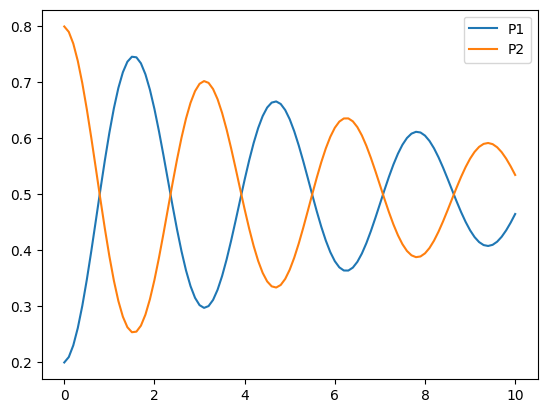

In [21]:
fig, ax = plt.subplots()

ax.plot(time, P1, label = "P1")
ax.plot(time, P2, label = "P2")
ax.legend()

In [22]:
expect_Z_list = expect_val_dm(states, sigmaZ().to(device))

In [23]:
_, states = lindblad_equation_FLS(rho, hamiltonian, time, Dt, [sigmaX().to(device)], [0.01 * 2 * np.pi], device)

In [24]:
expect_Z_list_FLS = expect_val_dm(states, sigmaZ().to(device))

In [25]:
P1_FLS = np.array([torch.real(state.matrix[0][0]).cpu() for state in states])
P2_FLS = np.array([torch.real(state.matrix[1][1]).cpu() for state in states])

/tmp/ipykernel_84703/1157335120.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


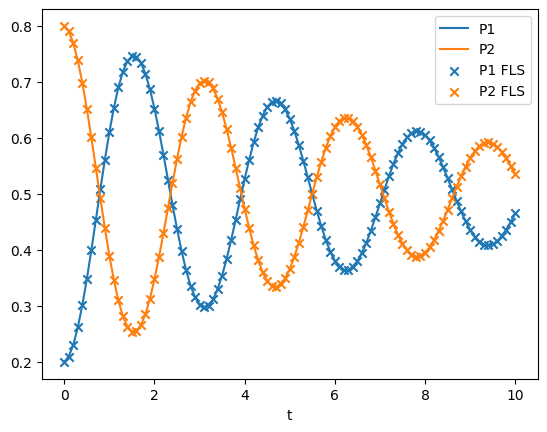

In [26]:
fig, ax = plt.subplots()

ax.plot(time, P1, label = "P1")
ax.plot(time, P2, label = "P2")
ax.scatter(time, P1_FLS, marker='x', label = "P1 FLS")
ax.scatter(time, P2_FLS, marker='x', label = "P2 FLS")
ax.set_xlabel("t")
ax.legend()
fig.show()

/tmp/ipykernel_84703/4105111327.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


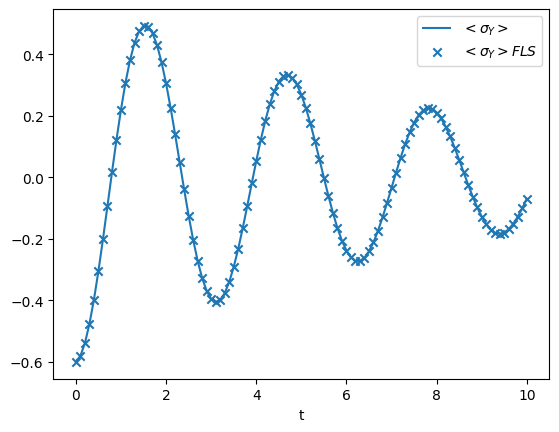

In [27]:
fig, ax = plt.subplots()

ax.plot(time, expect_Z_list, label = r"$<\sigma_Y>$")
ax.scatter(time, expect_Z_list_FLS, marker='x', label = r"$<\sigma_Y> FLS$")
ax.set_xlabel("t")
ax.set_xlabel("t")
ax.legend()
fig.show()